<a href="https://colab.research.google.com/github/RifatMuhtasim/Data_Science/blob/main/Time_Series_Forecast_Model/FBProphet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [13]:
df = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/ARIMA-And-Seasonal-ARIMA/master/perrin-freres-monthly-champagne-.csv")
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [14]:
df.columns=['month', 'sales']
df.head(5)

,month,sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [15]:
df.drop(105, axis="index", inplace=True)
df.drop(106, axis="index", inplace=True)

In [16]:
# Convert Month into Datetime
df['month']=pd.to_datetime(df['month'])
df.head()

,month,sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


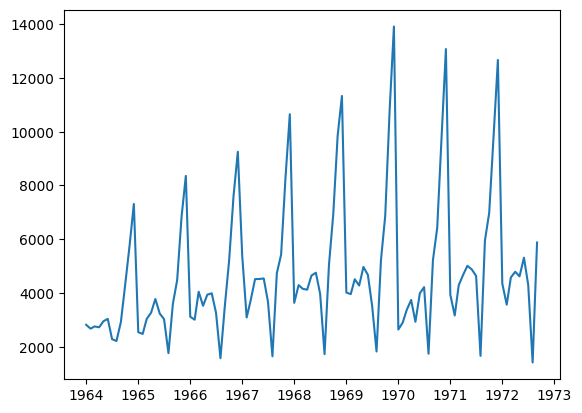

In [17]:
# Visualize the data
plt.plot(df['month'], df['sales'], linestyle='-')
plt.show()

# FBProphet

In [18]:
from prophet import Prophet
import logging


def FBProphet(df, timestamp, target, freq, periods):
    missing_forecast_model = Prophet()
    # Set the target column 'y' for Prophet
    new_df = pd.DataFrame()
    new_df['y'] = df[target]
    new_df['ds'] = pd.to_datetime(df[timestamp])

    # Suppress INFO messages from Prophet
    logging.getLogger('fbprophet').setLevel(logging.WARNING)
    logging.getLogger('cmdstanpy').setLevel(logging.WARNING)
    logging.getLogger('prophet').setLevel(logging.WARNING)

    missing_forecast_model.fit(new_df)
    if freq == "M":
        future = missing_forecast_model.make_future_dataframe(periods=periods, freq='M')
    elif freq == "Y":
        future = missing_forecast_model.make_future_dataframe(periods=periods, freq='Y')
    else:
        future = missing_forecast_model.make_future_dataframe(periods=periods)

    forecast = missing_forecast_model.predict(future)
    # Extract Forecast Values
    forecast_values = forecast['yhat'][-periods:].tolist()
    return forecast_values

In [19]:
forecast = FBProphet(df, timestamp= "month", target= "sales", freq="M", periods=10)
forecast

[6421.245169976237,
 9443.367715917124,
 12292.79083887933,
 4751.306516818418,
 4235.365999596901,
 4427.663341427701,
 5219.646063993371,
 5297.701204261811,
 5334.2696195938,
 5145.938622615062]

In [20]:
df.tail(3)

,month,sales
102,1972-07-01,4298.0
103,1972-08-01,1413.0
104,1972-09-01,5877.0


In [21]:
forecast_months = []
forecast_values = []
last_month = df['month'].iloc[-1]

for index, value in enumerate(forecast):
    forecast_month = last_month + pd.DateOffset(months=1+index)
    forecast_value = value
    forecast_months.append(forecast_month)
    forecast_values.append(forecast_value)

forecast_data = pd.DataFrame({'month': forecast_months, 'sales': forecast_values})

In [22]:
df = pd.concat([df, forecast_data], axis="rows", ignore_index=True)
df.tail(15)

,month,sales
100,1972-05-01,4618.000000
101,1972-06-01,5312.000000
102,1972-07-01,4298.000000
103,1972-08-01,1413.000000
104,1972-09-01,5877.000000
105,1972-10-01,6421.245170
106,1972-11-01,9443.367716
107,1972-12-01,12292.790839
108,1973-01-01,4751.306517
109,1973-02-01,4235.366000
